# This file will create an LSTM model trained on the speech signals from audio files

In [1]:
# Imports
import os
from os import environ
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import seaborn as sns
import numpy as np 
import IPython
from IPython.display import Audio
import matplotlib.pyplot as plt
import re
import pandas as pd
import librosa
import librosa.display
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import OneHotEncoder

def suppress_qt_warnings():
    environ["QT_DEVICE_PIXEL_RATIO"] = "0"
    environ["QT_AUTO_SCREEN_SCALE_FACTOR"] = "1"
    environ["QT_SCREEN_SCALE_FACTORS"] = "1"
    environ["QT_SCALE_FACTOR"] = "1"

paths = []
labels = []

# Choose one of the 3 code blocks below. NOT ALL 3

## 1: Small subsample of dataset for testing

In [ ]:
dirStr = "Datasets/SAVEE/KL/"
directory = os.fsencode(dirStr)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    paths.append(dirStr + filename)
    res = re.findall('([a-zA-Z ]*)\d*.*', filename)
    if res[0] == "a":
        labels.append("anger")
    if res[0] == "d":
        labels.append("disgust")
    if res[0] == "f":
        labels.append("fear")
    if res[0] == "h":
        labels.append("happiness")
    if res[0] == "n":
        labels.append("neutral")
    if res[0] == "sa":
        labels.append("sadness")
    if res[0] == "su":
        labels.append("surprise")

## 2: All datasets combined (Best results)

In [2]:
directory = "Datasets/"
for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        os.path.join(root, subdirectory)
    for file in files:
        if file.endswith(".wav"):
            filepath = os.path.join(root, file)
            splitpath = filepath.split("\\")
            splitpath = splitpath[len(splitpath)-1]
            try:
                rsplit = ""
                rsplit = splitpath.split("-")[2]
            except:{}
            try:
                ssplit = ""
                ssplit = re.findall('([a-zA-Z ]*)\d*.*', splitpath)[0]
            except:{}
            try:
                tsplit = ""
                tsplit = splitpath.split("_")[2]
                tsplit = tsplit.split(".")[0]
            except:{}
            if rsplit == "05" or ssplit == "a" or tsplit == "angry":
                labels.append("anger")
                paths.append(filepath)
            if rsplit == "07" or ssplit == "d" or tsplit == "disgust":
                labels.append("disgust")
                paths.append(filepath)
            if rsplit == "06" or ssplit == "f" or tsplit == "fear":
                labels.append("fear")
                paths.append(filepath)
            if rsplit == "03" or ssplit == "h" or tsplit == "happy":
                labels.append("happiness")
                paths.append(filepath)
            if rsplit == "01" or ssplit == "n" or tsplit == "neutral":
                labels.append("neutral")
                paths.append(filepath)
            if rsplit == "04" or ssplit == "sa" or tsplit == "sad":
                labels.append("sadness")
                paths.append(filepath)
            if rsplit == "08" or ssplit == "su" or tsplit == "ps":
                labels.append("surprise")
                paths.append(filepath)

## 3: All datasets combined and split into gendered emotion e.g. anger_female

In [2]:
directory = "Datasets/"

# Function specifically for the RAVDESS dataset
# Checks if the actor is female or male
def isMale(path):
    try:
        split1 = path.split("\\")[1]
        split2 = split1.split("_")[1]
        actornum = (int)(split2[0:2])
        #female
        if (actornum % 2) == 0:
            return False
        #male
        else:
            return True
    except: {}       
            
for root, subdirectories, files in os.walk(directory):
    for file in files:
        if file.endswith(".wav"):
            filepath = os.path.join(root, file)
            ravMale = isMale(filepath)
            splitpath = filepath.split("\\")
            splitpath = splitpath[len(splitpath)-1]
            try:
                rsplit = ""
                rsplit = splitpath.split("-")[2]
            except:{}
            try:
                ssplit = ""
                ssplit = re.findall('([a-zA-Z ]*)\d*.*', splitpath)[0]
            except:{}
            try:
                tsplit = ""
                tsplit = splitpath.split("_")[2]
                tsplit = tsplit.split(".")[0]
            except:{}
            if (rsplit == "05" and ravMale) or ssplit == "a":
                labels.append("anger_male")
                paths.append(filepath)
            if (rsplit == "07" and ravMale) or ssplit == "d":
                labels.append("disgust_male")
                paths.append(filepath)
            if (rsplit == "06" and ravMale) or ssplit == "f":
                labels.append("fear_male")
                paths.append(filepath)
            if (rsplit == "03" and ravMale) or ssplit == "h":
                labels.append("happiness_male")
                paths.append(filepath)
            if (rsplit == "01" and ravMale) or ssplit == "n":
                labels.append("neutral_male")
                paths.append(filepath)
            if (rsplit == "04" and ravMale) or ssplit == "sa":
                labels.append("sadness_male")
                paths.append(filepath)
            if (rsplit == "08" and ravMale) or ssplit == "su":
                labels.append("surprise_male")
                paths.append(filepath)
            if (rsplit == "05" and not ravMale) or tsplit == "angry":
                labels.append("anger_female")
                paths.append(filepath)
            if (rsplit == "07" and not ravMale) or tsplit == "disgust":
                labels.append("disgust_female")
                paths.append(filepath)
            if (rsplit == "06" and not ravMale) or tsplit == "fear":
                labels.append("fear_female")
                paths.append(filepath)
            if (rsplit == "03" and not ravMale) or tsplit == "happy":
                labels.append("happiness_female")
                paths.append(filepath)
            if (rsplit == "01" and not ravMale) or tsplit == "neutral":
                labels.append("neutral_female")
                paths.append(filepath)
            if (rsplit == "04" and not ravMale) or tsplit == "sad":
                labels.append("sadness_female")
                paths.append(filepath)
            if (rsplit == "08" and not ravMale) or tsplit == "ps":
                labels.append("surprise_female")
                paths.append(filepath)

## Combine the path and label lists into a dataframe

In [67]:
df = pd.DataFrame()
df['path'] = paths
df['emotion'] = labels
df = df.sample(frac = 1)
df.head()

,path,emotion
1956,Datasets/TESS\OAF_ditch_neutral.wav,neutral
3889,Datasets/TESS\YAF_nag_ps.wav,surprise
3602,Datasets/TESS\YAF_jar_ps.wav,surprise
707,Datasets/RAVDESS\Actor_14\03-01-06-01-02-02-14...,fear
968,Datasets/RAVDESS\Actor_19\03-01-06-02-01-01-19...,fear


### functions to create graphs easier

In [4]:
def waveplot(data, sr, emotion):
    plt.title(emotion)
    plt.ylabel('dB')
    librosa.display.waveplot(data, sr)
    plt.show()

def spectogram(data, sr, emotion):
    suppress_qt_warnings()
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(np.abs(x))
    plt.title(emotion)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

### show graphs of the first 'surprise' .wav file in the dataframe list

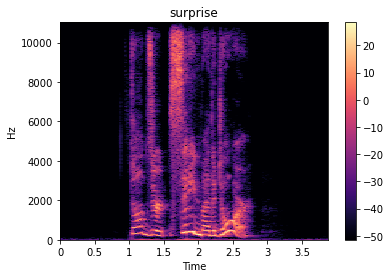

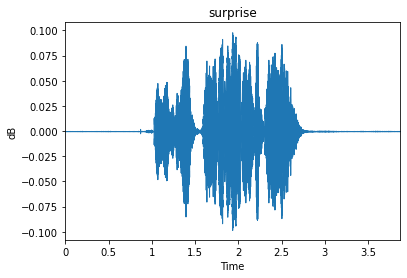

In [5]:
# emotion = 'surprise_male'
emotion = 'surprise'
path = df['path'][df['emotion']==emotion].values[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
waveplot(data, sampling_rate, emotion)

# Function for feature extraction

In [54]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=12, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
    
#Extract the mfcc's of a single file to test
extract_mfcc(df['path'][0])

array([-6.7043011e+02,  6.5463234e+01,  4.8822185e-01,  1.5117002e+01,
        8.7833881e+00,  1.0563951e+00, -4.2406769e+00, -3.1930442e+00,
       -1.3346264e+01, -2.9177351e+00,  5.3375721e-01, -3.2262831e+00,
        2.0105295e+00, -4.0300112e+00,  1.9380878e-01,  1.2353787e+00,
       -5.1382542e+00, -1.7780107e+00, -1.9244382e+00, -7.4367231e-01,
       -7.3666177e+00, -3.3326349e-01, -3.0078795e+00, -5.0382442e+00,
       -2.2274773e+00, -6.9816226e-01, -5.9582076e+00,  5.5907124e-01,
       -2.7585127e+00,  3.8554946e-01, -2.5434520e+00, -2.3236392e+00,
       -3.3210135e+00, -2.0330336e+00, -3.9490018e+00, -1.6773353e+00,
       -1.3858986e+00, -2.0310068e+00, -4.2552686e+00, -1.6869317e+00,
       -4.9827566e+00, -6.1422491e-01, -3.2716122e+00, -2.9301336e+00,
       -3.5054467e+00, -2.0374177e+00, -3.7777433e+00, -2.2589594e-01,
       -3.3432145e+00, -6.6649497e-01, -1.9549793e+00, -1.4666587e+00,
       -2.2266266e+00,  1.7620975e-01, -1.1741118e+00, -5.6873733e-01,
      

# Extract mfcc's of entire dataset

In [55]:
x_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [56]:
x = [x for x in x_mfcc]
x = np.array(x)
x = np.expand_dims(x, -1)
x.shape

(4528, 60, 1)

## Encode the emotion labels for each file

In [57]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['emotion']]).toarray()

In [59]:
from sklearn.model_selection import train_test_split
emoti = df[['emotion']]
emoti.shape
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
emoti.shape

(4528, 1)

# Create LSTM Model

In [60]:
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 123)               61500     
                                                                 
 dense_33 (Dense)            (None, 64)                7936      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-tra

## Train the model

In [61]:
generations = 30
# history = model.fit(x, y, validation_split=0.2, epochs=generations, batch_size=512, shuffle=True)
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=generations, batch_size=512, shuffle=True, use_multiprocessing=True)

Epoch 1/30
6/6 [==============================] - 5s 467ms/step - loss: 1.9205 - accuracy: 0.1940 - val_loss: 1.8899 - val_accuracy: 0.2224
Epoch 2/30
6/6 [==============================] - 2s 377ms/step - loss: 1.8625 - accuracy: 0.2331 - val_loss: 1.8302 - val_accuracy: 0.2268
Epoch 3/30
6/6 [==============================] - 2s 375ms/step - loss: 1.8003 - accuracy: 0.2548 - val_loss: 1.7700 - val_accuracy: 0.2517
Epoch 4/30
6/6 [==============================] - 2s 377ms/step - loss: 1.7319 - accuracy: 0.2747 - val_loss: 1.6900 - val_accuracy: 0.3002
Epoch 5/30
6/6 [==============================] - 2s 373ms/step - loss: 1.6565 - accuracy: 0.3380 - val_loss: 1.5941 - val_accuracy: 0.3996
Epoch 6/30
6/6 [==============================] - 2s 380ms/step - loss: 1.5752 - accuracy: 0.3954 - val_loss: 1.4949 - val_accuracy: 0.4349
Epoch 7/30
6/6 [==============================] - 2s 372ms/step - loss: 1.4645 - accuracy: 0.4591 - val_loss: 1.3703 - val_accuracy: 0.4834
Epoch 8/30
6/6 [====

## Plot accuracy of model

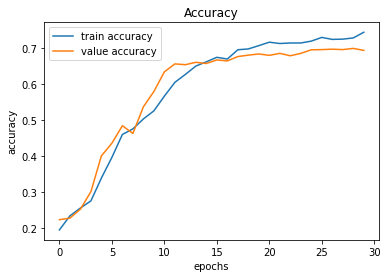

In [62]:
epochs = list(range(generations))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='value accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# history.history['true_positives']

# Save the model and encoder

In [ ]:
model.save('Models/GenderedAudioModel')
# model.save('Models/AudioModel')

import pickle 
file = open('Objects/encoder.obj', 'wb') 
pickle.dump(enc, file)

# Create a prediction of a single file using the model

In [56]:
import keras
model = keras.models.load_model('Models/AudioModel')

In [63]:
testthing = "TestAudio/angry.wav"
mfcc = extract_mfcc(testthing)
y = [y for y in mfcc]
y = np.array(y)
y = np.expand_dims(y, -1)
print(y.shape)

feature = pd.DataFrame(data=mfcc)
feature = feature.stack().to_frame().T
twodim = np.expand_dims(feature, axis=2)
pred = model.predict(twodim, batch_size=32, verbose=1)
print(pred)

(60, 1)
1/1 [==============================] - 0s 402ms/step
[[0.11094113 0.21399269 0.09409618 0.16316709 0.15228385 0.14620522
  0.11931388]]


In [64]:
# pred1 = pred.argmax(axis=1)
# abc = pred1.astype(int).flatten()
prediction = (enc.inverse_transform(pred))
prediction

array([['disgust']], dtype=object)